## Gradient Boost Regressor Model For Birth Time Prediction
by Theophilus L. Owiti
### Synopsis
Major problems faced with birth is <i><u>response to emergency during time of delivery</u></i>. Data from area X is used to tell a story and a possible solution for the area X in predicting birth time in order to save lives of mothers who do not live near medical centres.

## Table of Contents
* [Chapter 1: Preprocessing & Importation](#preprocessing-and-importation-of-data)
   * [Import Libraries](#importing-libraries)
   * [Import Dataset](#importing-the-data-set)
   * [Preprocessing](#preprocessing)
   * [Feature Selection](#feature-selection)
      * [Pearson's R Correlation](#correlations)
* [Chapter 2: Data Exploration](#data-exploration)
   * [Basic Statistical Operations](#barchart--histograms-with-some-statistics)
   * [Get Height from BMI](#get-height-from-bmi-body-mass-index)
   * [Distributions in Area X](#data-distribution)
   * [Learn About Blood Pressure Trend in Area X](#learning-about-the-trend-in-blood-pressure-for-most-expectant-mothers)
   * [Learn About The Trend in Mothers Weight](#data-insight-into-weight)
* [Chapter 3: Formulation of Machine Learning Model](#3-formulation-of-machine-learning-model)
   * [Import your dataset](#import-your-data-set)
   * [Models predictions, evaluation & selection](#models-prediction-evaluation-and-selection)
      * [(a)Gradient Boost Regressor](#a-gradient-boost-regressor-model)
      * [(b)Multiple Linear Regression using Tensorflow NN](#b-multiple-linear-regression-with-tensorflow)
* [Conclusion](#conclusion)
   
   

# 1: Preprocessing and Importation of Data
*---------------------------------------------------------------------------------------------------------------------------------------------*

<b>SciKit Learn will be used in importing our GBR Model</b>
<br>
Gradient Boost Regressor with Scikit Learn

![](img/sklearn.png) ![](img/scipy.png)


### Importing Libraries

In [72]:
#import necessary tools
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


### Importing the data set


In [2]:
# we use pandas to import our dataset
dataset=pd.read_csv('labourward2.csv')
dataset.head()



,systolic,diastolic,BMI,momWeight/10,timeValueinHrs,days,BMIScaled,timeScaled,daysScaled
0,110,80,19.3,5.59,20.33,26.3,1.93,2.033,2.63
1,124,86,18.5,5.59,7.25,27.7,1.85,0.725,2.77
2,110,80,19.3,5.59,15.50,27.5,1.93,1.550,2.75
3,124,86,25.1,5.59,9.35,26.3,2.51,0.935,2.63
4,122,76,19.3,5.59,20.22,27.6,1.93,2.022,2.76


*-----------------------------------------------------------![Data Exploration](img/explore.png) ----------------------------------------------------------------*
# 2: Data Exploration

*-------------------------------Let us start by first of all exploring our data and important facts that we can uncover-----------------*


## Barchart & Histograms with some statistics
### Barchart
A barchart is used to fish out important details against a dependent variable to find insight in data and create a general profile for all mothers in area X. It helps us discover interesting information and check for normal situations.

### Histograms
In order to decide on correlation we must use the histograms to see what type of distribution we are dealing with and try transform the distribution.

## MEAN
$\mu= \frac{1}{m}\sum\limits_{i=1}^{m}(x)$
&emsp;
<br>
We get to know the average BMI, Weight and Height of an expectant mother from Area X

In [3]:
mean=np.average(dataset['momWeight/10']*10)
print(f"Mean Weight of a mother: {mean:.4f} kg")

Mean Weight of a mother: 69.4594 kg


In [4]:
mean_of_bmi=np.average(dataset['BMI'])
print(f"Mean BMI of a mother: {mean_of_bmi:.4f}")

Mean BMI of a mother: 22.0495


## Get Height from BMI (Body Mass Index)
(a) $ Height^{2} = \frac{Weight}{BMI} $

(b) $ Height = \sqrt{\frac{Weight}{BMI}} $

In [5]:
mean_BMI=np.average(dataset['BMI'])
mean_Weight=np.average(dataset['momWeight/10']*10)
Height=np.sqrt(mean_Weight/mean_BMI)
print(f"Mean Height of a mother: {Height:.4f} metres")

Mean Height of a mother: 1.7749 metres


### Calculating Standard Deviation
$\sigma=\sqrt{\frac{1}{m}\sum\limits_{i=1}^{m}(x{i}-\mu)^2}$

In [6]:
#function for standard deviation
mothers=np.array(dataset['momWeight/10'])
#print(mothers[6])
def standardDev(x,mu):
    for i in range(len(x)):
     sqr_diff=(x[i]-mu)**2

    std_dev=np.sqrt(sqr_diff/len(x))
    return std_dev

#returns the standard deviation
standard_deviation=standardDev(mothers,mean)
print(f"Standard Deviation: {standard_deviation} | Varicance: {(standard_deviation)**2}")

Standard Deviation: 6.065687600399882 | Varicance: 36.792566065644884


# Data Distribution

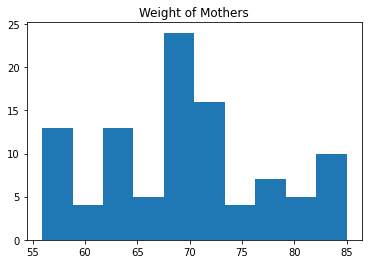

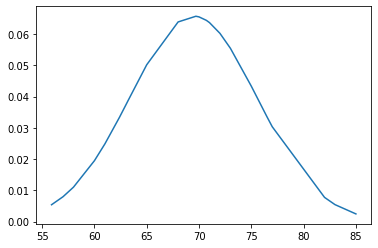

In [7]:
x_axis=np.array(dataset['momWeight/10']*10)
#x_axis
#y_axis=np.array(dataset['BMI'])
#y_axis
plt.title('Weight of Mothers')
plt.hist(x_axis)
plt.show()

#drawing the normal curve over the histogram

plt.plot(x_axis, norm.pdf(x_axis, mean, standard_deviation))
plt.show()

### Fitting the curve
![Normal Distribution](img/bioweight.png)


Distribution for BMI

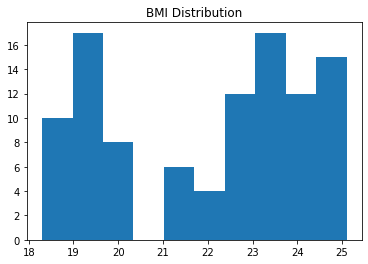

In [8]:
x_BMI=np.array(dataset['BMI'])
#x_axis
#y_axis=np.array(dataset['BMI'])
#y_axis
plt.title('BMI Distribution')
plt.hist(x_BMI)
plt.show()

# Feature Transformation
### Preprocessing
Import required transformers from SciKit Learn
- We cannot work with data that is not normal during correlation therefore there is a need to transform the data

In [9]:
#from sklearn.preprocessing import power_transform as pwrTrans #abandon since it gave wrong transformation
from sklearn.preprocessing import quantile_transform as qtTrans

X_data=np.array(dataset['momWeight/10']).reshape(-1,1)
no_of_items=len(X_data)
no_of_items

101

In [10]:

transformedDataX=qtTrans(X_data,n_quantiles=10,random_state=0,copy=True)
transformedDataX[7:15]


array([[0.11111111],
       [0.11111111],
       [0.11111111],
       [0.11111111],
       [0.11111111],
       [0.11111111],
       [0.15555556],
       [0.15555556]])

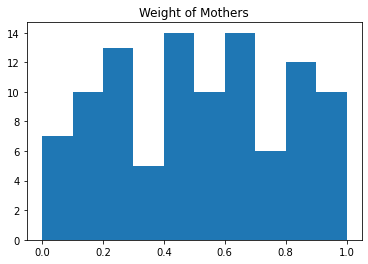

In [11]:
x_axis2=(transformedDataX)
#x_axis
#y_axis=np.array(dataset['BMI'])
#y_axis
plt.title('Weight of Mothers')
plt.hist(x_axis2)
plt.show()
mean_=np.mean(transformedDataX)
stdv=standardDev(transformedDataX,mean)
#drawing the normal curve over the histogram

plt.show()

In [12]:
X_data2=np.array(dataset['BMI']).reshape(-1,1)
no_of_BMI=len(X_data)
no_of_BMI

101

In [13]:
bmiDataTrans=qtTrans(X_data2,n_quantiles=10,random_state=0,copy=True)
bmiDataTrans[7:15]

array([[0.77777778],
       [0.55555556],
       [0.22222222],
       [0.66666667],
       [0.22222222],
       [0.66666667],
       [0.02469136],
       [0.55555556]])

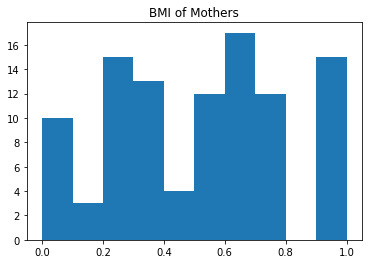

In [14]:
x_axis4=(bmiDataTrans)
#x_axis
#y_axis=np.array(dataset['BMI'])
#y_axis
plt.title('BMI of Mothers')
plt.hist(x_axis4)

plt.show()

The above transformation are not complete and do not justify the correct distribution. Therefore it is wise to use the original distributions.

# Feature Selection
## Correlations
We will use Pearson's R Coefficient of Correlation to guide us in selecting features

<b>(a) Correlation between</b>: days and BMI
<br>
<br>
Our sample size gives us a Pearson's R Coefficient of about: <b><u>0.05</u></b>

In [16]:
#computing Pearson's R Correlation
from sklearn.feature_selection import r_regression
X=np.array(dataset['BMI']).reshape(-1,1)
y=np.array(dataset['days'])
r=r_regression(X,y,center=True,force_finite=True)
print(f"Karl Pearson's R Coefficient= {r[0]:.4f}")

Karl Pearson's R Coefficient= 0.0515


<b>(b) Correlation between</b>: Weight and Days
<br>
<br>
Our sample size gives us a Pearson's R Coefficient of about: <b><u>0.13</u></b>

In [17]:
#computing Pearson's R Correlation
import sklearn as sk
X=np.array(dataset['momWeight/10']).reshape(-1,1)
y=np.array(dataset['days'])
r=sk.feature_selection.r_regression(X,y,center=True,force_finite=True)
print(f"Karl Pearson's R Coefficient= {r[0]:.4f}")

Karl Pearson's R Coefficient= 0.1287


<b>(c) Correlation between</b>: Systolic Pressure and Days
<br>
<br>
Our sample size gives us a Pearson's R Coefficient of about: <b><u>0.13</u></b>

In [21]:
#computing Pearson's R Correlation
from sklearn.feature_selection import r_regression
X=np.array(dataset['systolic']).reshape(-1,1)
y=np.array(dataset['days'])
r=r_regression(X,y,center=True,force_finite=True)
print(f"Karl Pearson's R Coefficient= {r[0]:.4f}")

Karl Pearson's R Coefficient= 0.1340


<b>(d) Correlation between</b>: Diastolic Pressure and Days
<br>
<br>
Our sample size gives us a Pearson's R Coefficient of about: <b><u>-0.05</u></b>

In [20]:
#computing Pearson's R Correlation
from sklearn.feature_selection import r_regression
X=np.array(dataset['diastolic']).reshape(-1,1)
y=np.array(dataset['days'])
r=r_regression(X,y,center=True,force_finite=True)
print(f"Karl Pearson's R Coefficient= {r[0]:.4f}")

Karl Pearson's R Coefficient= -0.0530


Our results tells us it is best to use BMI and partially weight for regression, to give the best possible model.
The features chosen were BMI, Weight choosing Blood Pressure separately would not be ideal.

# Learning about the trend in Blood Pressure for most expectant mothers
We learn and discover important facts about blood pressure of expectant women in Area X.
The aim of finding out common data patterns in blood pressure from the mothers is to aim at:
* Making conclusions on expected blood pressure in order to conclude abnormal blood pressure and abnormal blood pressure.
* Learning about major trends of the systolic and diastolic and make conclusions.

In order to achieve the above stated mission we plot a bar graph with averages of both systolic and diastolic.

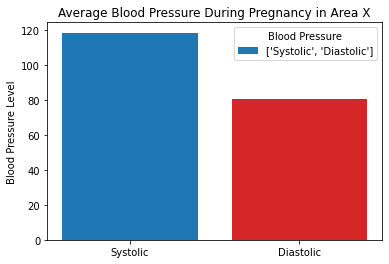

In [42]:
fig,ax=plt.subplots()
bar_labels=['Systolic','Diastolic']
bar_colors=['tab:blue','tab:red']
x_axis=['Systolic','Diastolic']
#x_axis
y_axis=np.array([np.average(dataset['systolic']),np.average(dataset['diastolic'])])
#y_axis
"""plt.bar(x_axis,y_axis, width=0.8)
plt.show()
"""

#plot different bar colors
ax.bar(x_axis,y_axis,label=bar_labels,color=bar_colors)
ax.set_ylabel('Blood Pressure Level')
ax.set_title('Average Blood Pressure During Pregnancy in Area X')
ax.legend(title='Blood Pressure')

#show bar graph
plt.show()

<b>Normal blood pressure ranges between: </b> <u>120/80mmHg - 90/60mmHg</u>
<br>
High Blood Pressure comes about above <u>140/90mmHg</u> 

In area X it is clear that the average blood pressure for an expectant mother is at about <i><u>120/80mmHg</u></i> of barometric pressure as expected.

# Data Insight into Weight
The questions you want to ask is what is the popular weight amongst expectant mother and what is the least weight in order to find a conclusion if most mothers are healthy or mulnurished.

In [66]:

maximum_w=np.max(dataset['momWeight/10']*10)
print('Expectant mother\'s max weight= ',maximum_w)
minimum_w=np.min(dataset['momWeight/10']*10)
print('Expectant mother\'s min weight= ',minimum_w)

#weight categories
w1=0
w2=0
w3=0
w4=0
m_weight=np.array(dataset['momWeight/10']*10)

for i in range(len(m_weight)):
    if m_weight[i]>=50 and m_weight[i]<=60:
        w1+=1
    elif m_weight[i]>60 and m_weight[i]<=70:
        w2+=1
    elif m_weight[i]>70 and m_weight[i]<=80:
        w3+=1
    elif m_weight[i]>80 and m_weight[i]<=90:
        w4+=1
        
print(f"Mothers between 50-60 kgs= {w1}\nMothers between 61-70 kgs=  {w2}\nMothers between 71-80 kgs=  {w3}\nMothers between 81-90 kgs=  {w4}")

Expectant mother's max weight=  85.0
Expectant mother's min weight=  55.9
Mothers between 50-60 kgs= 15
Mothers between 61-70 kgs=  44
Mothers between 71-80 kgs=  27
Mothers between 81-90 kgs=  15


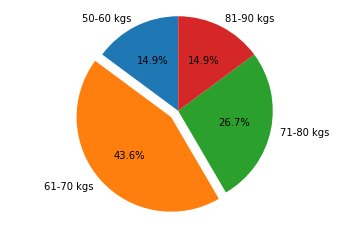

In [74]:
#plotting a pie chart for the nnumber of mothers in different categories
pie_labels='50-60 kgs','61-70 kgs','71-80 kgs','81-90 kgs'
pie_sizes=[w1,w2,w3,w4]
explode = (0, 0.1, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(pie_sizes, explode=explode, labels=pie_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 3: Formulation of Machine Learning Model
*----------------------------------------------------------------------------------------------------------------------------------------------------------*

### Import your data set
Make sure to import the data that you want to use after doing analysis and use this data for regression.

In [75]:
x=np.array(dataset[['BMIScaled','momWeight/10']])
print(f"{x.shape} is x size")

y=np.array(dataset['timeScaled'])
print(f"{y.shape} is y size")

(101, 2) is x size
(101,) is y size


### Split it into Test and Train Set
It is important to use train_test_split() function provided by sklearn in order to split the dataset into the required test and train dataset.

In [76]:
#test set and train set
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)

## Models Prediction, Evaluation and Selection
At this point we compare other models to Gradient Boost Regressor and find out how they perform against Gradient Boost Regressor and see which is the best.

### (a) Gradient Boost Regressor Model
Import model from sklearn then fit into training data then get prdiction where<br>

$\hat{y}=model.predict(data)$

In [168]:
#the model itself
gbr_model=GradientBoostingRegressor(n_estimators=200,max_depth=1,random_state=1)
#fit training data
gbr_model.fit(train_x,train_y)
#use test set to give prediction
y_hat=gbr_model.predict(test_x)

In order to get a meaningful output from the prediction, some data manipulation is performed to recalculate time from plain hours to hours and minutes. In order to see our variables and see their predictions.

In [169]:
#print predictions
#len(test_x) for range
for i in range(10):
    res=y_hat[i]*10
    m=(round((res-int(res))*60,0))/100
    h=math.trunc(res)
    time=m+h
    if time>0.0 and time<12.0:
     
     print(f"{(test_x[i][0])*10} BMI\t{round(test_x[i][1]*10,2)} kg  = Prediction: {time:0.2f} am")
    elif time>11.59 and time<23.59:
        time=round(time-12.00,2)#convert into 12hrs clock
        if time>=0.0 and time<=0.59:
         print(f"{(test_x[i][0])*10} BMI\t{round(test_x[i][1]*10,2)} kg = Prediction: {time+12.00:0.2f} pm")
        elif time>0.59:
         print(f"{(test_x[i][0])*10} BMI\t{round(test_x[i][1]*10,2)} kg = Prediction: {time:0.2f} pm")

18.3 BMI	83.0 kg = Prediction: 2.24 pm
22.7 BMI	75.0 kg = Prediction: 3.32 pm
20.2 BMI	62.4 kg = Prediction: 2.22 pm
23.4 BMI	85.0 kg  = Prediction: 10.16 am
24.3 BMI	68.0 kg  = Prediction: 10.53 am
24.3 BMI	77.0 kg = Prediction: 12.38 pm
20.2 BMI	70.0 kg = Prediction: 2.03 pm
24.3 BMI	76.5 kg = Prediction: 12.38 pm
20.099999999999998 BMI	76.5 kg = Prediction: 4.06 pm
20.2 BMI	70.0 kg = Prediction: 2.03 pm


### Performing simple evaluation- RMSE, MAE

In [170]:
#get the RMSE of the model
tRMSE=MSE(test_y,y_hat)**0.5
print(f"RMSE value : {tRMSE:.2f}")

RMSE value : 0.53


In [171]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(f"RMSE root: {np.sqrt(mean_squared_error(test_y,y_hat)):0.2f}")
print(f"MAE root: {np.sqrt(mean_absolute_error(test_y,y_hat)):0.2f}")


RMSE root: 0.53
MAE root: 0.64


## Visualizing the GBR Model

In [97]:
params = {
    "n_estimators": 200,#number of trees
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

c:\Users\theop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


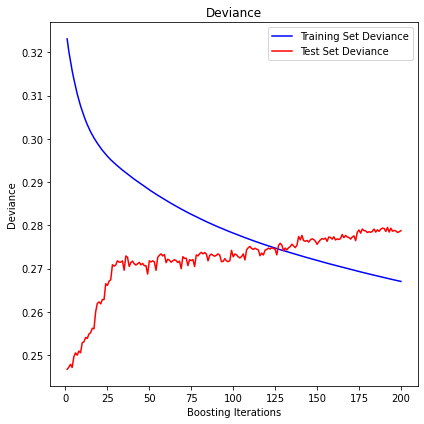

In [98]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbr_model.staged_predict(test_x)):
    test_score[i] = gbr_model.loss_(test_y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    gbr_model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

### (b) Multiple Linear Regression with Tensorflow
![ ](img/TensorFlow_Logo_with_text-removebg-preview.png)
<br>
We can utilize the linear regression model using tensorflow to find out which algorithm does better.
<br>
We will have to import some important tensorflow libraries

In [133]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError 
import tensorflow as tf
import math
model=Sequential([
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=1,activation='linear')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=MeanSquaredError())

model.fit(train_x,train_y,epochs=1000)



Epoch 1/1000
3/3 [==============================] - 1s 4ms/step - loss: 0.8954
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.5268
Epoch 3/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3968
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3937
Epoch 5/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3965
Epoch 6/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3805
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3658
Epoch 8/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.3749
Epoch 9/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.3844
Epoch 10/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3941
Epoch 11/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3898
Epoch 12/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.3758
Epoch 13/1000
3/3 [==============================

In [134]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 25)                75        
                                                                 
 dense_22 (Dense)            (None, 15)                390       
                                                                 
 dense_23 (Dense)            (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [141]:
y_hat=np.array(model.predict(test_x)).reshape(-1)# change n-darray to array just reshape(-1)
#print predictions
#len(test_x) for range
for i in range(10):
    res=y_hat[i]*10
    m=(round((res-int(res))*60,0))/100
    h=math.trunc(res)
    time=m+h
    if time>0.0 and time<12.0:
     
     print(f"{(test_x[i][0])*10} BMI\t{round(test_x[i][1]*10,2)} kg  = Prediction: {time:0.2f} am")
    elif time>11.59 and time<23.59:
        time=round(time-12.00,2)#convert into 12hrs clock
        if time>=0.0 and time<=0.59:
         print(f"{(test_x[i][0])*10} BMI\t{round(test_x[i][1]*10,2)} kg = Prediction: {time+12.00:0.2f} pm")
        elif time>0.59:
         print(f"{(test_x[i][0])*10} BMI\t{round(test_x[i][1]*10,2)} kg = Prediction: {time:0.2f} pm")

1/1 [==============================] - 0s 118ms/step
18.3 BMI	83.0 kg = Prediction: 1.05 pm
22.7 BMI	75.0 kg = Prediction: 1.56 pm
20.2 BMI	62.4 kg = Prediction: 1.60 pm
23.4 BMI	85.0 kg = Prediction: 1.34 pm
24.3 BMI	68.0 kg = Prediction: 12.52 pm
24.3 BMI	77.0 kg = Prediction: 1.29 pm
20.2 BMI	70.0 kg = Prediction: 2.00 pm
24.3 BMI	76.5 kg = Prediction: 1.27 pm
20.099999999999998 BMI	76.5 kg = Prediction: 1.39 pm
20.2 BMI	70.0 kg = Prediction: 2.00 pm


In [153]:
history=model.fit(train_x,train_y,validation_split=0.2,verbose=0,epochs=50)
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
45,0.313794,0.259649,45
46,0.313737,0.260888,46
47,0.315518,0.264378,47
48,0.313235,0.265021,48
49,0.315685,0.264735,49


## Reasons why Tensorflow's Deep Neural Network Linear Regression wasn't chosen:
(a) The plot below shows the major deviance per iteration, despite the attractive mean absolute error this needs to be optimized more in order to fit the curve right.

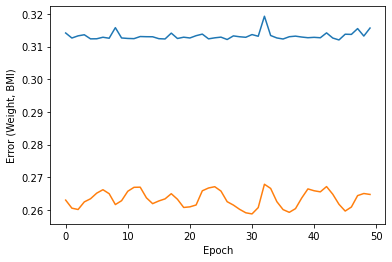

In [155]:
def plot_loss(history):
      plt.plot(history.history['loss'], label='loss')
      plt.plot(history.history['val_loss'], label='val_loss')
      
      plt.xlabel('Epoch')
      plt.ylabel('Error (Weight, BMI)')
     
    

plot_loss(history)

In [157]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(f"RMSE root: {np.sqrt(mean_squared_error(test_y,y_hat)):0.2f}")
print(f"MAE root: {(mean_absolute_error(test_y,y_hat)):0.2f}")


RMSE root: 0.50
MAE root: 0.42


Beyond the above reason the error distribution for the tensorflow model still needs further fine tuning in order to achieve a desired and sensible distribution. This will involve going back to the board.

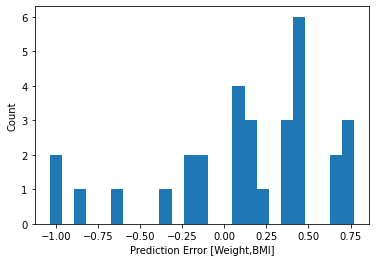

In [162]:
error = y_hat - test_y
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Weight,BMI]')
_ = plt.ylabel('Count')

# Conclusion
The Gradient Boost Regressor at the first stage has shown promising results when it comes to issue of deviance, it is a proper model to use since- it has a small deviance and also its RMSE and MAE do not largely differ from Tensorflows DNN Model.

Further research and improvement of the model still needs to be done in order to realise statistical significance and to be ready for public consumption.